In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('Davis.csv', index_col=0).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 200
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     181 non-null    object 
 1   weight  181 non-null    int64  
 2   height  181 non-null    int64  
 3   repwt   181 non-null    float64
 4   repht   181 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 8.5+ KB


In [89]:
train, test = train_test_split(df, test_size=50, stratify=df['sex'])

In [90]:
train.head()

,sex,weight,height,repwt,repht
40,M,65,187,67.0,188.0
88,F,53,165,53.0,165.0
194,F,51,156,51.0,158.0
45,M,85,179,82.0,175.0
104,F,45,163,45.0,160.0


<AxesSubplot:ylabel='Frequency'>

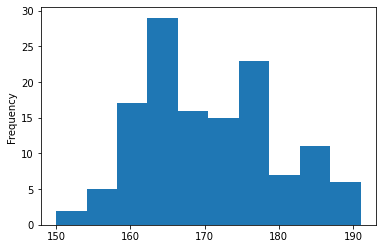

In [91]:
train['height'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

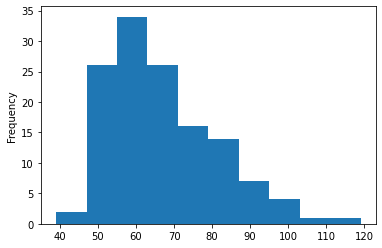

In [92]:
train['weight'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

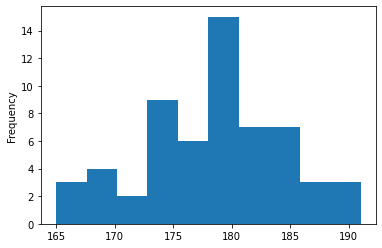

In [93]:
train[train.sex=='M']['height'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

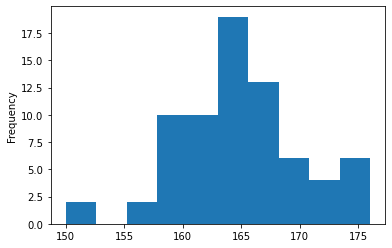

In [94]:
train[train.sex=='F']['height'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

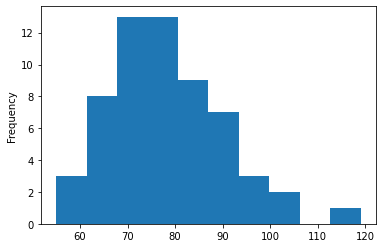

In [95]:
train[train.sex=='M']['weight'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

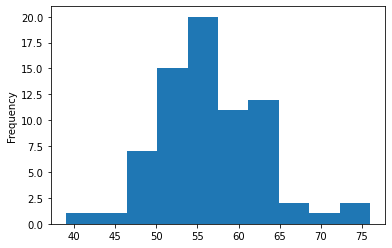

In [96]:
train[train.sex=='F']['weight'].plot(kind='hist')

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model = LogisticRegression(n_jobs=4)

In [99]:
model.fit(train[['height', 'weight']], train['sex'])

LogisticRegression(n_jobs=4)

In [100]:
test['predicted'] = model.predict(test[['height', 'weight']])

In [101]:
test

,sex,weight,height,repwt,repht,predicted
44,M,78,183,80.0,180.0,M
156,M,54,169,58.0,165.0,F
193,F,59,164,59.0,165.0,F
64,F,78,173,75.0,169.0,M
116,F,62,168,62.0,163.0,F
123,F,68,178,68.0,175.0,M
35,F,68,169,63.0,170.0,F
165,M,56,163,58.0,161.0,F
167,F,63,170,62.0,168.0,F
19,M,76,197,75.0,200.0,M


<AxesSubplot:xlabel='height', ylabel='weight'>

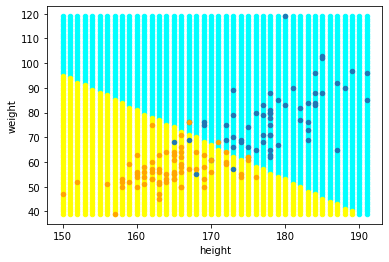

In [102]:
figure, axes = plt.subplots(1)

fill_ = []
for h in range(train['height'].min(), train['height'].max()+1):
    for w in range(train['weight'].min(), train['weight'].max()+1):
        fill_.append({'height': h, 'weight': w})
fill_df = pd.DataFrame(fill_)
fill_df['sex'] =  model.predict(fill_df[['height', 'weight']])

fill_df[fill_df['sex']=='M'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes,
                                                       color='#00FFFF')
fill_df[fill_df['sex']=='F'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes,
                                                   color='yellow')

train[train['sex']=='M'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes)
train[train['sex']=='F'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes,
                                                   color='orange')

<AxesSubplot:xlabel='height', ylabel='weight'>

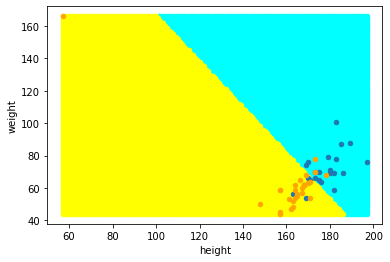

In [103]:
figure, axes = plt.subplots(1)

fill_ = []
for h in range(test['height'].min(), test['height'].max()+1):
    for w in range(test['weight'].min(), test['weight'].max()+1):
        fill_.append({'height': h, 'weight': w})
fill_df = pd.DataFrame(fill_)
fill_df['sex'] =  model.predict(fill_df[['height', 'weight']])

fill_df[fill_df['sex']=='M'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes,
                                                       color='#00FFFF')
fill_df[fill_df['sex']=='F'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes,
                                                   color='yellow')

test[test['sex']=='M'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes)
test[test['sex']=='F'][['height', 'weight']].plot(kind='scatter', x='height', y='weight', ax=axes,
                                                   color='orange')